In [2]:
cd C:\\Users\\Talha

C:\Users\Talha


In [3]:
pwd

'C:\\Users\\Talha'

In [13]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import data set
data=pd.read_csv('Wine.csv')
#data.head()

##feature aur label alag alag kiye
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

#data split hua ha 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#feature scaling hui ha
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [14]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [15]:
x.shape

(178, 13)

In [16]:
# feature scaling k bad principle of component analysis
from sklearn.decomposition import PCA

# 13 feaures ko 2 dimension ma convert karega
#n_components =2 per graph nazer ayega is k ilawa nhi baqi change kar k accuracy dekh sakte hu
pca=PCA(n_components=2)              # n_components ki ga hum 3, ya 5 likh sakte ha jha sahi result mile accuracy_score ma nicha

#x_train ko 2 dimension ma badla
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [17]:
x_train.shape

(133, 2)

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10, criterion='entropy' , random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [19]:
# DecisionTreeClassifier ki training ho gai so ab x_test jo k testing data ha uski prediction karni ha
y_pred=classifier.predict(x_test)


# y_test aur y_pred ko reshpaekar kar k akatha karega concatenate
y_pred=y_pred.reshape(len(y_pred),1)
y_test=y_test.reshape(len(y_test),1)
print(np.concatenate((y_test,y_pred),1))

[[1 1]
 [3 3]
 [2 2]
 [1 1]
 [2 2]
 [2 1]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [3 3]
 [1 1]
 [2 2]
 [3 3]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [3 3]
 [2 2]
 [2 2]
 [3 3]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]]


In [20]:
# ab model ki prediction ki accuracy nikale
from sklearn.metrics import accuracy_score,confusion_matrix
am=accuracy_score(y_pred,y_test)
print(am)
cm=confusion_matrix(y_test,y_pred)
print(cm)

#confusion matrix 3x3 ka is liye bna q k isma 3 classes ha

0.9777777777777777
[[16  0  0]
 [ 1 20  0]
 [ 0  0  8]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


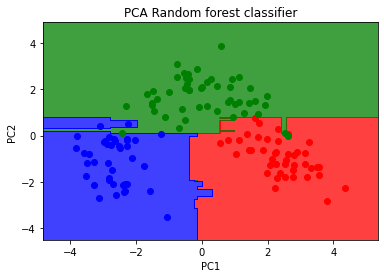

In [21]:
#visualization wala code

# graphical representation k liye
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min() - 1 , stop=x_set[:,0].max() + 1 ,step=0.01),
                 np.arange(start=x_set[:,1].min() - 1,  stop=x_set[:,1].max() + 1 ,step=0.01))

plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,
             cmap=ListedColormap(('red','green','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green','blue'))(i),label=j)
    
plt.title('PCA Random forest classifier')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()